# Mini Project 5 Report
## Jiadao Zou, jxz172230

# Q1

In [233]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [234]:
bh = pd.read_csv("bodytemp-heartrate.csv")

In [235]:
bh.head(3)

,body_temperature,gender,heart_rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74


In [236]:
bh_male = bh[bh["gender"] == 1]
bh_female = bh[bh["gender"] == 2]

## (a)

In [237]:
def normCI(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.norm.ppf((1 + confidence) / 2.)
    #     return m, m-h, m+h
    print("From {:0.2%}".format(confidence),"confidence interval analysis of normal distribution, mean is %f, lower bound is %f, upper bound is %f" %(m, m-h, m+h))

In [238]:
print("Male:")
print("normal Confidence Interval for male:")
normCI(bh_male["body_temperature"])
print("IQR of male's body tempertaure is {:0.3}.".format(bh_male["body_temperature"].quantile(.75) - bh_male["body_temperature"].quantile(.25)))
bh_male["body_temperature"].describe()

Male:
normal Confidence Interval for male:
From 95.00% confidence interval analysis of normal distribution, mean is 98.104615, lower bound is 97.934745, upper bound is 98.274485
IQR of male's body tempertaure is 1.0.


count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: body_temperature, dtype: float64

In [239]:
print("Female:")
print("normal Confidence Interval for female:")
normCI(bh_female["body_temperature"])
print("IQR of female's body tempertaure is {:0.3}.".format(bh_female["body_temperature"].quantile(.75) - bh_female["body_temperature"].quantile(.25)))
bh_female["body_temperature"].describe()

Female:
normal Confidence Interval for female:
From 95.00% confidence interval analysis of normal distribution, mean is 98.393846, lower bound is 98.213102, upper bound is 98.574591
IQR of female's body tempertaure is 0.8.


count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: body_temperature, dtype: float64

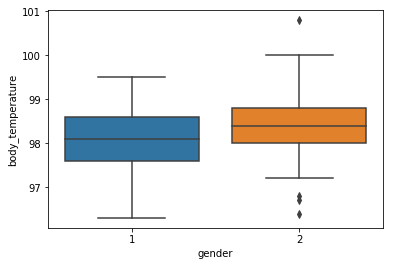

In [240]:
fig1 = sns.boxplot(data=bh, x='gender', y='body_temperature')

**Answer**
> Above boxplot, IQR information and CI analysis tells us that there is a bit difference (0.2 degree)_in mean body temperature of male and female in this sample. Meantime, we also notice that female's group has some outlires while male's group's doesn't have such scenario.

## (b)

In [241]:
print("Male:")
normCI(bh_male["heart_rate"])
print("IQR of male's heart rate is {:0.3}.".format(bh_male["heart_rate"].quantile(.75) - bh_male["heart_rate"].quantile(.25)))
bh_male["heart_rate"].describe()

Male:
From 95.00% confidence interval analysis of normal distribution, mean is 73.369231, lower bound is 71.940952, upper bound is 74.797509
IQR of male's heart rate is 8.0.


count    65.000000
mean     73.369231
std       5.875184
min      58.000000
25%      70.000000
50%      73.000000
75%      78.000000
max      86.000000
Name: heart_rate, dtype: float64

In [242]:
print("Female:")
normCI(bh_female["heart_rate"])
print("IQR of female's heart rate is {:0.3}.".format(bh_female["heart_rate"].quantile(.75) - bh_female["heart_rate"].quantile(.25)))
bh_female["heart_rate"].describe()

Female:
From 95.00% confidence interval analysis of normal distribution, mean is 74.153846, lower bound is 72.183436, upper bound is 76.124256
IQR of female's heart rate is 12.0.


count    65.000000
mean     74.153846
std       8.105227
min      57.000000
25%      68.000000
50%      76.000000
75%      80.000000
max      89.000000
Name: heart_rate, dtype: float64

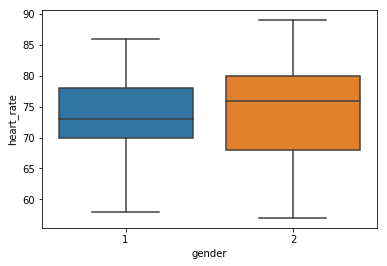

In [243]:
fig2 = sns.boxplot(data=bh, x='gender', y='heart_rate')

**Answer**
> bove boxplot, IQR information and CI analysis tells us that there is a bit difference (0.8)_in mean heart rate of male and female in this sample. 

## (c)

> print plot for each gender

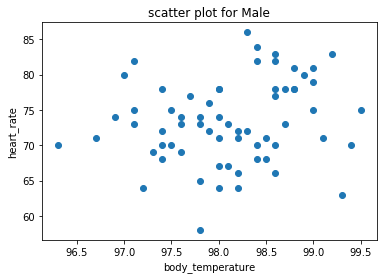

Correlation coefficeient for male is: 0.1956


In [244]:
plt.title("scatter plot for Male")
plt.xlabel("body_temperature")
plt.ylabel("heart_rate")
plt.scatter(x=bh_male["body_temperature"], y=bh_male["heart_rate"])
plt.show()
print("Correlation coefficeient for male is: {:0.4}".format(bh_male["body_temperature"].corr(bh_male["heart_rate"])))

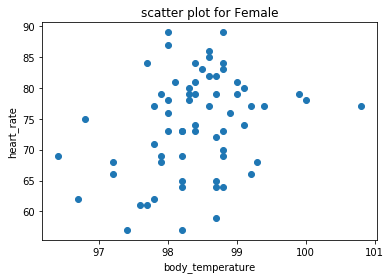

Correlation coefficeient for female is: 0.2869


In [245]:
plt.title("scatter plot for Female")
plt.xlabel("body_temperature")
plt.ylabel("heart_rate")
plt.scatter(x=bh_female["body_temperature"], y=bh_female["heart_rate"])
plt.show()
print("Correlation coefficeient for female is: {:0.4}".format(bh_female["body_temperature"].corr(bh_female["heart_rate"])))

**Answer**  
> It is hard to say there exist strong liner relationship between body temperature and heart rate from the plots above.  
    Also we know that:  
        1. 0 indicates no linear relationship.
        2. +1 indicates a perfect positive linear relationship.
        3. -1 indicates a perfect negative linear relationship.
        4. Values between 0 and 0.3 (0 and -0.3) indicate a weak positive (negative) linear relationship via a shaky linear rule.
        5. Values between 0.3 and 0.7 (-0.3 and -0.7) indicate a moderate positive (negative) linear relationship via a fuzzy-firm linear rule.
        6. Values between 0.7 and 1.0 (-0.7 and -1.0) indicate a strong positive (negative) linear relationship via a firm linear rule.  
  Now look at the correlation coefficient, it tells us that both gender have a linear relationship of two factors, however, they are both weak realtionship while male group's linear relationship is weaker than female's.

# Q2

In [246]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [247]:
nSet = pd.Series([5, 10, 30, 100])
laSet = pd.Series([0.01, 0.1, 1, 10])
alpha = 0.05

In [248]:
def tCI(data, confidence=1-alpha):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
#    print("From {:0.2%}".format(confidence),"confidence interval analysis of t-student distribution, mean is %f, lower bound is %f, upper bound is %f" %(m, m-h, m+h))

> (a)

In [249]:
# Monte Carlo Method
def MC1(n, la, rep=5000):
    CI1_correctCount = CI2_correctCount = CI1_UP = CI1_LO = CI2_UP = CI2_LO = 0
    
    for x in range(rep):
        mu = 1/la
        samples = np.random.exponential(scale=mu, size=n)
        
        # CI-1: t-distribution
#         tRes = stats.t.interval(0.95, len(samples)-1, loc=np.mean(samples), scale=stats.sem(samples))
#         CI1_lo = tRes[0]
#         CI1_up = tRes[1]
        _, CI1_lo, CI1_up = tCI(samples)
        CI1_LO += CI1_lo/rep
        CI1_UP += CI1_up/rep
        if (mu >= CI1_lo) and (mu <= CI1_up):
            CI1_correctCount += 1
        # CI-2: Bootstrap
        CI2 = bs.bootstrap(samples, stat_func=bs_stats.mean, alpha=alpha)
        CI2_LO += CI2.lower_bound/rep
        CI2_UP += CI2.upper_bound/rep
        if (mu >= CI2.lower_bound) and (mu <= CI2.upper_bound):
            CI2_correctCount += 1
    print("For n = {} and lambda = {} :".format(n, la))        
    print("CI1 t-Distribution correctness: {:%}. CI is [{}, {}].".format(CI1_correctCount/rep, CI1_LO, CI1_UP))
    print("CI2 Bootstrap correctness: {:%}. CI is [{}, {}].".format(CI2_correctCount/rep, CI2_LO, CI2_UP))
#     return CI1_correctCount/rep, CI2_correctCount/rep

In [250]:
MC1(5, 0.1, rep=30)

For n = 5 and lambda = 0.1 :
CI1 t-Distribution correctness: 90.000000%. CI is [-0.7986163282186334, 24.134100665649257].
CI2 Bootstrap correctness: 76.666667%. CI is [3.342795581940013, 18.714945253547334].


> (b)

In [263]:
def MCplotting(sample_size, laSet, rep=5000):
    
    for la in laSet:
        bootstrap_results = []
        normal_results = []
        
        for n in sample_size:
            bootstrap_tmps = np.array([0, 0], dtype='float')
            normal_tmps =  np.array([0, 0], dtype='float')
            mean_result = 0
            for rr in range(rep):
                mu = 1/la
                samples = np.random.exponential(scale=mu, size=n)
                mean_result += samples.mean()/rep
                bsr = bs.bootstrap(samples, stat_func=bs_stats.mean, alpha=0.05)
                mr = stats.t.interval(1-0.05, len(samples)-1, loc=np.mean(samples), scale=stats.sem(samples))
                
                bootstrap_tmps += np.array([bsr.lower_bound, bsr.upper_bound]) /rep
                
                normal_tmps += np.array(mr)/rep
            
            bootstrap_results.append(tuple(bootstrap_tmps))
            normal_results.append(tuple(normal_tmps))
        
        plt.plot(sample_size, [x[1] for x in bootstrap_results], c='blue', marker='.')
        plt.plot(sample_size, [x[1] for x in normal_results], linestyle='--', c='orange', marker='.')

        plt.plot(sample_size, [x[0] for x in bootstrap_results], c='blue', 
                 label='Bootstrap', marker='.')
        plt.plot(sample_size, [x[0] for x in normal_results], linestyle='--', c='orange', 
                 label='t-distribution', marker='.')

        plt.axhline(mean_result, c='black', label='True Mean')

#         plt.axvline(x=10, c='red',linewidth=.5)

        plt.legend(loc='best')
        plt.title('t-distribution vs Bootstrap with lambda is {}.'.format(la))
        plt.xlabel("sample size")
        plt.show()

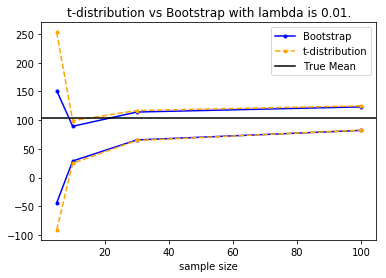

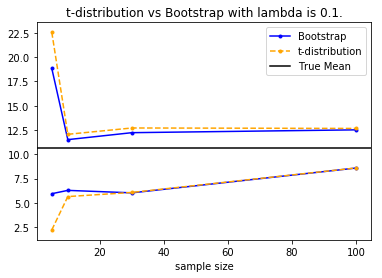

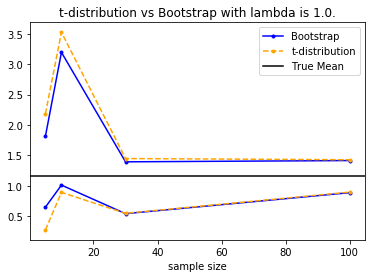

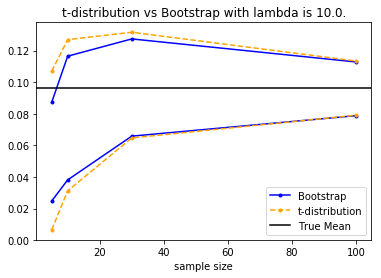

In [264]:
MCplotting(nSet, laSet, rep=5000)

## Above images are wrong, rerun to see the result

**Answer**
> - First, we all know that t-distribution is an approximation to normal distribution when sample size is large. To hold the same confidence level when sample size is small, the tail is relatively heavy and make interval wider. 
- Cause the number is not straight-forward, here I choose line graph to compare two algorithms.  
- As you can see, the CI of t-student distribution is always wider than Bootstrap's, which indicates Bootstrap's describing capability is better than t-student distribution especially in cases that sample size is small. Because, under same confident level 95%, thinner the CI is, accurater the model is. However, when sample size growing larger, like when it is 100, the difference of two distribution is unable to see.  
- Also, with lambda $\lambda$ goes larger, the difference of two models becomes smaller according to data of Y labels.
- Since we know that for Exponential distribution, $\mu={{1}\over{\lambda}}$, and $var={{1}\over{\lambda^2}}$, that is why with $\lambda$ going higher, the gap betwwen upper bound and lower bound decreases. 

> (c)

**Answer**
> - From the graph above, 30 is a large enough sample size for t-distribution to get almost the same result from Bootstrap.
- In case of the bootstrap interval, 30 is also the number ensure the population mean drop inside the CI and IQR is monotonously decreasing afterwards.
- Obviously, these answers do depend on $\lambda$
- Normally, we could say Boostrap is better than t-stundent distribution when sample size is small. However, the scenario is not always holding because we should also take the computation resource (time/ memory) cost into consideration.
- Therefore, if I don't need to worry about computing and only considering about accuracy or when sample size is very small(<< 30), I would use Bootstrap. If I ask for speed and smaple size is large enough, t-student interval is better.

> (d)

**Answer**
> - Yes, the answer is depent on $\lambda$, because we could easily see that the curve has different trend. 
- The CIs of first two image goes sharply down instantly, while the last two CIs first becomes a bit larger, then decrease graduately. AS we know the first two $\lambda$ are less than 1, and the last one is larger than 1.

# Reference
> https://365datascience.com/linear-regression/

In [ ]:
print("{} + {} =".format(1,2))

In [ ]:
mr = stats.t.interval(1-0.05, len(samples)-1, loc=np.mean(samples), scale=stats.sem(samples))
mr

In [ ]:
tuple(x/5 for x in mr)

In [ ]:
a = np.array(mr)*2+np.array(mr)

In [260]:
np.array([0, 0], dtype='float')+np.array([1,2])

array([1., 2.])

In [ ]:
a= b = c = d = 0
a+=1
print(b)